In [1]:
pip install apyori          

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Groceries_dataset.csv")

In [4]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [5]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Date is type of object we will transform it to datetime

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [9]:
df["itemDescription"].nunique()             # 167 different types of item we have

167

In [10]:
df["Date"].nunique()                     # 728 different days

728

In [11]:
df["day"] = (df["Date"]).dt.day
df["month"] = (df["Date"]).dt.month
df["year"] = (df["Date"]).dt.year                # Added day month and year columns

In [12]:
df

,Member_number,Date,itemDescription,day,month,year
0,1808,2015-07-21,tropical fruit,21,7,2015
1,2552,2015-05-01,whole milk,1,5,2015
2,2300,2015-09-19,pip fruit,19,9,2015
3,1187,2015-12-12,other vegetables,12,12,2015
4,3037,2015-01-02,whole milk,2,1,2015
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,10,8,2014
38761,2022,2014-02-23,candy,23,2,2014
38762,1097,2014-04-16,cake bar,16,4,2014
38763,1510,2014-03-12,fruit/vegetable juice,12,3,2014


In [13]:
df["month_name"] = (df["Date"]).dt.month_name()
df["weekday"] = (df["Date"]).dt.day_name()                     # Added name of the day and month

In [14]:
df

,Member_number,Date,itemDescription,day,month,year,month_name,weekday
0,1808,2015-07-21,tropical fruit,21,7,2015,July,Tuesday
1,2552,2015-05-01,whole milk,1,5,2015,May,Friday
2,2300,2015-09-19,pip fruit,19,9,2015,September,Saturday
3,1187,2015-12-12,other vegetables,12,12,2015,December,Saturday
4,3037,2015-01-02,whole milk,2,1,2015,January,Friday
...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,10,8,2014,August,Sunday
38761,2022,2014-02-23,candy,23,2,2014,February,Sunday
38762,1097,2014-04-16,cake bar,16,4,2014,April,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,12,3,2014,March,Wednesday


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   day              38765 non-null  int64         
 4   month            38765 non-null  int64         
 5   year             38765 non-null  int64         
 6   month_name       38765 non-null  object        
 7   weekday          38765 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.4+ MB


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Monthly Sales')

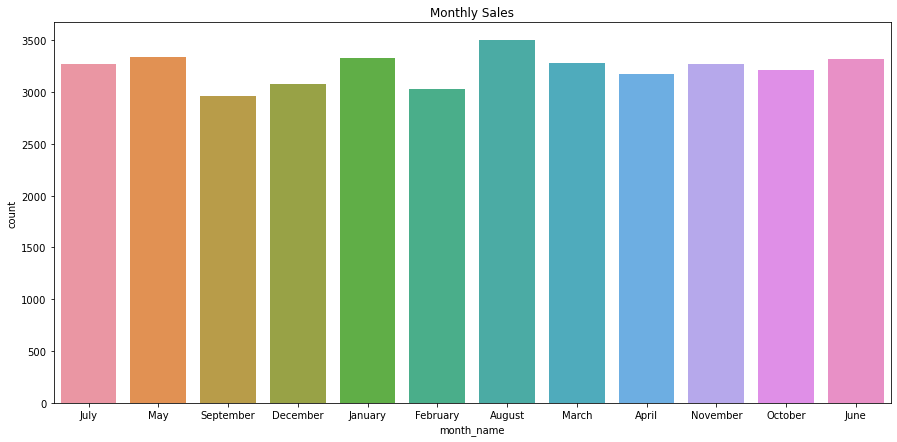

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(df["month_name"])
plt.title("Monthly Sales")

Text(0.5, 1.0, 'weekday')

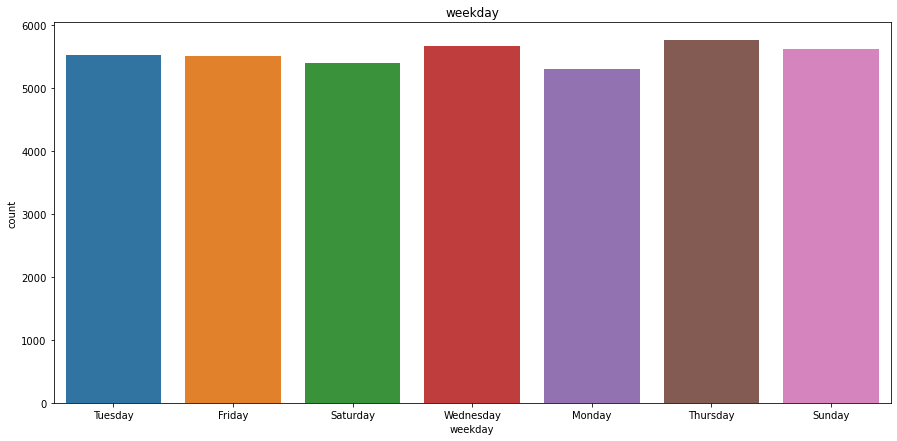

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(df["weekday"])
plt.title("weekday")

In [19]:
a = df["itemDescription"].value_counts()
a

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [20]:
a/100                          # We can see the percantages

whole milk               25.02
other vegetables         18.98
rolls/buns               17.16
soda                     15.14
yogurt                   13.34
                         ...  
rubbing alcohol           0.05
bags                      0.04
baby cosmetics            0.03
kitchen utensil           0.01
preservation products     0.01
Name: itemDescription, Length: 167, dtype: float64

In [21]:
b = a.head(10)

In [22]:
b

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [23]:
df2 = pd.DataFrame(b)

In [24]:
df2

,itemDescription
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924
citrus fruit,812


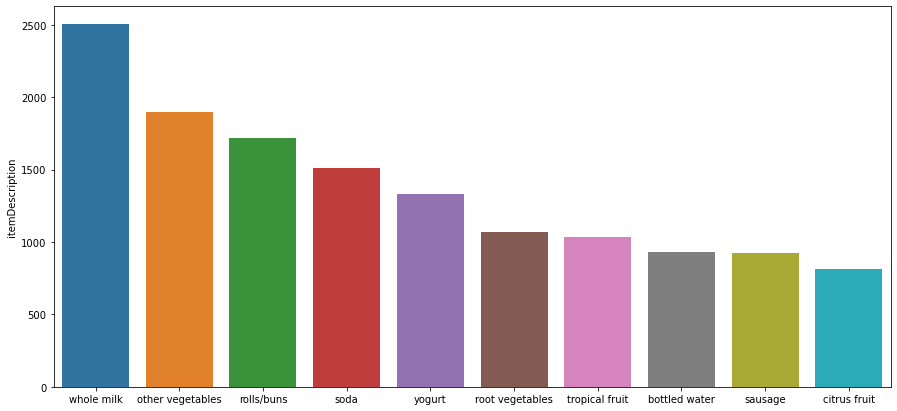

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(x = df2.index, y = df2["itemDescription"]); 

In [26]:
df3 = df.set_index(["Date"])

In [27]:
df3

,Member_number,itemDescription,day,month,year,month_name,weekday
Date,,,,,,,
2015-07-21,1808,tropical fruit,21,7,2015,July,Tuesday
2015-05-01,2552,whole milk,1,5,2015,May,Friday
2015-09-19,2300,pip fruit,19,9,2015,September,Saturday
2015-12-12,1187,other vegetables,12,12,2015,December,Saturday
2015-01-02,3037,whole milk,2,1,2015,January,Friday
...,...,...,...,...,...,...,...
2014-08-10,4471,sliced cheese,10,8,2014,August,Sunday
2014-02-23,2022,candy,23,2,2014,February,Sunday
2014-04-16,1097,cake bar,16,4,2014,April,Wednesday


<AxesSubplot:title={'center':'Numbers of Items Sold by Month'}, xlabel='Date'>

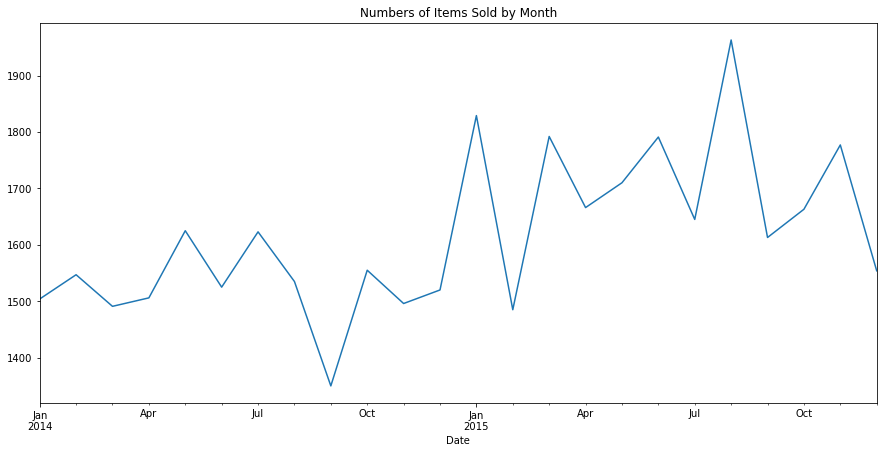

In [28]:
df3.resample("M")['itemDescription'].count().plot(figsize = (15,7), title = "Numbers of Items Sold by Month")

### Prepearing the data for Apyori

In [29]:
df4 = df[["Member_number","itemDescription"]].sort_values(by = "Member_number", ascending = False)

In [30]:
df4

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [31]:
transaction_list = [a[1]['itemDescription'].tolist() 
                    for a in list(df4.groupby(['Member_number']))]  # Combining all the items in list format for each customer

In [32]:
from apyori import apriori

In [33]:
rules = apriori(transactions = transaction_list, min_support = 0.002, min_confidence = 0.05, min_lift = 2.5, min_length = 2, max_length = 2) # Model Creation

In [34]:
results = list(rules)      # Storing results in list format for better visualisation

In [35]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'rice', 'UHT-milk'}), support=0.0028219599794766545, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rice'}), items_add=frozenset({'UHT-milk'}), confidence=0.22448979591836735, lift=2.859677204215019)]),
 RelationRecord(items=frozenset({'frozen fish', 'baking powder'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'frozen fish'}), confidence=0.0743801652892562, lift=2.870632517797234), OrderedStatistic(items_base=frozenset({'frozen fish'}), items_add=frozenset({'baking powder'}), confidence=0.08910891089108912, lift=2.8706325177972345)]),
 RelationRecord(items=frozenset({'potato products', 'beef'

In [36]:
def inspect(results):
    left         = [tuple(result[2][0][0])[0] for result in results]
    right         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(left, right, supports, confidences, lifts))
final_df = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Lets see Apyori result

In [37]:
final_df

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,rice,UHT-milk,0.002822,0.224490,2.859677
2,baking powder,frozen fish,0.002309,0.074380,2.870633
3,potato products,beef,0.002565,0.454545,3.802185
4,canned fruit,coffee,0.002309,0.428571,3.728954
5,soups,chicken,0.003335,0.270833,2.693134
6,chocolate marshmallow,meat,0.002565,0.166667,2.619624
7,condensed milk,pot plants,0.002052,0.086022,2.890619
8,condensed milk,processed cheese,0.002565,0.107527,2.794265
9,meat spreads,cream cheese,0.002052,0.228571,2.582526
